In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第21章 資本資產定價模型（CAPM）

## 21.1資本資產定價模型的核心思想

回顧上一章，Markowitz 模型用嚴謹的數理工具告訴投資者應該如何建構自己投資組合，不過在 20 世紀 50 年代該模型提出時，計算機並未普及、而且計算能力非常有限，實際投資中應用 Markowitz 模型是一項計算量大、難度強、成本高的工作。基於這些問題，學者們開始嘗試從實證的角度出發，深入挖掘 Markowitz 模型，希望能夠簡化 Markowitz 模型、將其應用在現實投資中。在 20 世紀 60 年代初，三位學者 Sharpe（1964）、Lintner（1965）、Mossin（1966）在 Markowitz 模型框架下不約而同推導出奠定現代投資學的經典模型：資本資產模型（Capital asset pricing model，CAPM）。三位學者經過嚴格地推導都得到以下結論：對於任意的資產組合 $q$，其收益率 $R_q$ 滿足以下關係式：

\begin{equation}\label{eq:21.1}
\mathrm{E}(R_q)-R_f=\beta_{qm}[\mathrm{E}(R_m)-R_f]
\end{equation}

公式 (\ref{eq:21.1}) 被稱為傳統的 CAPM 模型，式中 $R_m$ 是巿場投資組合之收益率，該組合是市場上所有風險資產的組合，包括股票等金融資產、也包括黃金等實物資產。現實中，建構這樣的投資組合不大可能實作，因此實務上常以大盤指數來指代市場投資組合，根據大盤指數計算出來的收益率被看作 $R_m$；$\beta_{qm}=\dfrac{\sigma(R_q,R_m)}{\sigma^2(R_m)}$ 為投資組合 $q$ 的 Beta 值，其中 $\sigma(R_q,R_m)$ 為資產組合收益率與市場投資組合收益率之問的共變異數，$\sigma^2(R_m)$ 為市場投資組合的變異數，Beta 值反應出資產組合 $q$ 的系統風險；$\mathrm{E}(R_m)-R_f$ 為風險投資組 $q$ 比無風險資產高出的期望收益率，高出來的部分是因為投資人在持有風險組合 $q$ 時承擔了更多的風險，因此 $\mathrm{E}(R_q)-R_f$ 被稱為風險溢酬（Risk premium）。

傳統 CAPM 模型中投資組合 $q$ 可以是任意投資組台，因此可以是單支股票 $i$，我們就可以得到當前常見的 CAPM 模型之表示式：

\begin{equation}\label{eq:21.2}
\mathrm{E}(R_i)=R_f+\beta_i[\mathrm{E}(R_m)-R_f]
\end{equation}

其中 $\beta_{i}=\dfrac{\sigma(R_i,R_m)}{\sigma^2(R_m)}$ 可以反應出單支股票的系統風險水平，若 $\beta_i=1$ ，則股票 $i$ 的價格和大盤指數的波動性是一致的；若 $|\beta_i|<1$，則股票 $i$ 的價格波動程度小於大盤指數；若 $|\beta_i|>1$，股票 $i$ 的價格波動更大一些。$\beta$ 值為正說明股票的價格與大盤指數同方向變動，反之則反向變動。CAPM 模型說明，單支股票的期望收益是無風險收益加上系統性風險溢酬，非系統風險可以透過分散投資消除，因此沒有對應的風險溢酬。如果將公式 (\ref{eq:21.2}) 用圖形表示出來，縱軸為不同股票或投資組合收益率之期望值，橫軸為對應的 Beta 值，可以得到一直線、這條直線被稱為證券市場（Security Market Line），該直線截距為 $R_f$、斜率為 $\mathrm{E}(R_m)-R_f$

圖21.1 證券市場線

<div id="fn9"><sup>9</sup>blah blah blah</div>

## 21.2 CAPM 模型的應用

CAPM 模型一經提出，迅速在學術界和實務界得到廣泛應用。在學術界，CAPM 模型在研究企業金融（Corporate Finance）方面已經成為學者們必用的偵測模型；在投資（Investment）方面的研究中，CAPM 模型也被用來驗證新的投資策略是否奏效；也有學者從模型本身出發，嘗試讓 CAPM 模型進一步貼近現實。在投資界，CAPM 模型可謂經久不衰，很多券商會提供個股的 $\beta$ 值以供投資者參照；Alpha 策略也成為專業投資人必備的技能。在企業財務管理領域，CAPM 的流行程度可以從 Graham 和 Harvery（2001）[<sup>10</sup>](#fn10) 的問卷調查結果中看出，他們對 392 位 CFO 發放了調查問卷，結果發現有 73% 的 CFO 總是或者經常使用 CAPM 模型來作為融資成本的參照。在金融界著名的特許金融分析師（Chartered Financial Analyst，CFA）考試中，CAPM 模型是必考的內容。

綜合以上所述，CAPM模型在首次提出後的 50 年裡，理論發展和實務應用都沒有結束歷史的浪潮。接下來，我們重點介紹投資界中 CAPM 模型的應用。

CAPM 模型公式中個股與大盤指數的收益率都是期望值，Jensen (1968)[<sup>11</sup>](#fn11) 在研究共同基金表現時將 CAPM 模型寫成以下形式：

\begin{equation}
R_{it}-R_{ft}=\alpha_i+\beta_i(R_{mt}-R_{ft})+\varepsilon_{it}\label{eq:21.3}
\end{equation}

進行實證分析 $R_{it}$、$R_{ft}$、$R_{mt}$ 對應的是個股 $i$、無風險資產（通常用銀行存款、國債）、市場指數（大盤指數）的收益率之時間序列資料，對這些資料進行線性回歸分析，得到未知參數 $\alpha_i$ 和 $\beta_i$ 的估計值 $\hat\alpha_i$ 和 $\hat\beta_i$。式 (\ref{eq:21.3}) 中的是由 Jensen 引入的，所以又被稱為 Jensen's Alpha。

<div id="fn10"><sup>10</sup>blah blah blah</div>
<div id="fn11"><sup>11</sup>blah blah blah</div>

根據 CAPM 模型之假設，$R_{it}$ 是服從常態分佈的亂數，這樣我們就可以判斷 $\hat\alpha_i$ 和 $\hat\beta_i$ 之統計顯著性。$\hat\beta_i$ 可以解釋個股過去的收益率與風險之問的關係。從 CAPM 模型來看，所有資產的 $\hat\alpha_i$ 應該都應該是 0（或者是不顯著地異於 0），若 $\hat\alpha$ 顯著異於 0，則稱個股 $i$ 有異常報酬（Abnormal Return），Alpha 值代表收益率勝過大盤的郚分，常常用來衡量基金經理人的績效。基金經理人嘗試利用各種分析方法創造顯著的正 Alpha。這些分析方法大致上可以分為幾種：基本面、消息面、技術面、Alpha 策略。

* 基本面分析透過研究企業的財務狀況來判斷企業的價值。一般從三個層面進行研究：經濟環境分析、產業分析、企業分析，比如研究國際、國內的經濟發展狀況、產業的週期及競爭狀況、企業的財務報表及內部運作情況等。運用基本面分析的投資策略很簡單，買入被低估的股票，賣出被高估的股票，通常基本面分析結果比較適合作為中長期投資參照，基本面投資獲得超額收益的訣竅在於比市場更早地發現被低估或者被高估的股票，在股價上漲之前買入，然後在股價上漲後賣出以獲取利潤。

* 技術面分析的基本信仰是「歷史會重演亅，只分析市場價格行為（股價走勢、成交量、主力資金等），由此來判斷股價的走勢。技術面分析由於缺少理論上的支援而備受爭議，比如著名投資大師巴菲特曾說過：「我知道技術分析不會有用，當我把圖表上下復原卻得不出一個不同的答案後」。儘管如此，技術分析界也不乏傳奇人物，比如上世紀技術分析大師威亷．江恩（William Delbert Gann）在投資市場縱橫 45 年，經歷了第一次世界大戰、1929 年美國股市大崩潰、30 年代大蕭條、第二次世界大戰，在這樣動盪的年代中，他賺取了 5,000 多萬美元利潤，相當於現在的 5 億多美元。

* 消息面分析是關注市場上的各種訊息，包括巨觀政策、工業政策、企業財務、經營狀況等各類訊息，然後分析股票的價格是否受訊息的影響、受怎麼樣的影響，然後根據分析結果進行相關操作，消息面分析運用的方法主要是基於 CAPM 模型的事件研究法。消息面分析很容易與基本面分析混淆，因為市場上的訊息通常都是關於巨觀政策、工業政策、企業狀況的，這些訊息都是關於企業基本面的，不過基本面分析者不會看到訊息就有所反應，而是會先進行研究，判斷訊息的真假、訊息是否會實現、是否會影響到企業的內在價值，然後與現在的股價相比較後才決定是否要買進。

* Alpha 策略的出發點是 CAPM 模型，核心思想是透過建構投資組合對沖掉系統風險，鎖定Alpha 超額收益。若在有賣空機制的市場，對沖投資組合比較好建構：首先明確整個投資組合的資金，然彶確定出有較高 Alpha 收益的、需要做多的證券組合（股票或者 ETF）和具有市場指數特徵的、用來對沖掉系統性風險的、需要做空的證券組台，其次配置好資金的比重，最終獲得穩定的 Alpha 收益。另外也可以用證券和股指期貨結合進行操作，比如投資者預測出未來會跑贏大盤的證券，則可以在證券市場將其買入，同時在期貨市場賣空股指期貨合約，這樣市場的漲跌不會影響到投資組合的收益，以對沖掉系統性風險。


接下來，我們先舉例說明如何用 Python 估計 CAPM 模型的參數 $\alpha$、$\beta$。

## 21.3 Python 計算單資產 CAPM 實例

我們以 2016 年的黑松股票的收益率作為 CAPM 模型中的 $R_i$，加權股價指數收益率作為 $R_m$，來計算黑松股票的 Beta 值。另外，無風險利率使用'央行單券－－CDs1 年期'的利率，年息百分比率為 0.38 將年息轉化成日度利率，則日度無風險利率為：

$$
\begin{split}
R_f&=(1+0.0038)^{1/360}-1 \\
&=1.053560616215421e-05
\end{split}
$$

首先，獲取加權股價指數的收益率，將其命名為「mktret」。

In [2]:
# 獲取指數資料
import pandas as pd
import numpy as np
indexData=pd.read_csv('.\\PythonBook_code_data\\part3\\021\\index.csv',sep='\t')
np.unique(indexData.CoName)

mktData=indexData[indexData.CoName=='TSE Taiex    ']
print(mktData.head())

mktret=pd.Series(mktData.ROI.values,index=pd.to_datetime(mktData.Date))
mktret.name='mktret'
mktret.head()

array(['TSE Taiex    ', 'TW 50 INDEX  ', 'TW MID-CAP INDEX',
       'TWSE CG100 TR Index', 'Taiwan HC 100'], dtype=object)

      CO_ID         CoName        Date        ROI
0   Y9999    TSE Taiex      2014/01/02     0.0120
3   Y9999    TSE Taiex      2014/01/03    -0.7663
6   Y9999    TSE Taiex      2014/01/06    -0.5444
9   Y9999    TSE Taiex      2014/01/07     0.1446
12  Y9999    TSE Taiex      2014/01/08     0.5135


Date
2014-01-02       0.0120
2014-01-03      -0.7663
2014-01-06      -0.5444
2014-01-07       0.1446
2014-01-08       0.5135
Name: mktret, dtype: object

接下來，獲取黑松股票的收益率資料。

In [3]:
# 獲取黑松股票的收益率資料
HeySong=pd.read_csv('.\\PythonBook_code_data\\part3\\021\\1234.csv',sep='\t')
HeySong.index=pd.to_datetime(HeySong.Date)
print(HeySong.head())

print(HeySong.tail())

HeySongret=HeySong.ROI
HeySongret.name='returns'

                  Date  Close   Open   High    Low  Volume     ROI
Date                                                              
2015-01-05  2015-01-05  34.87  34.68  35.05  34.59     182  0.0000
2015-01-06  2015-01-06  35.24  34.68  35.24  34.68     130  1.0582
2015-01-07  2015-01-07  35.47  35.14  35.51  35.14     125  0.6545
2015-01-08  2015-01-08  35.42  35.42  35.51  35.42     115 -0.1300
2015-01-09  2015-01-09  35.51  35.47  35.51  35.38     103  0.2604
                  Date  Close   Open  High    Low  Volume     ROI
Date                                                             
2016-12-26  2016-12-26  32.45  32.45  32.6  32.35      20  0.0000
2016-12-27  2016-12-27  32.45  32.35  32.6  32.35      14  0.0000
2016-12-28  2016-12-28  32.50  32.35  32.5  32.35      21  0.1541
2016-12-29  2016-12-29  32.35  32.35  32.5  32.35      27 -0.4615
2016-12-30  2016-12-30  32.30  32.35  32.4  32.20      96 -0.1546


然後將黑松股票和巿場指數收益率合併在一起，並計算各自的風險溢酬：

In [4]:
# 將黑松股票和市場指數收益率合併再一起，將沒有交易的資料移除
retData=pd.concat([HeySongret,mktret],axis=1).dropna()
retData=retData.astype(np.float)*0.01
print(retData.head())

# 計算無風險收益率
rf=1.0038**(1/360)-1
rf

# 計算股票超額收益率和市場風險溢酬
Excess_ret=retData['2016']-rf
print(Excess_ret.tail())

             returns    mktret
Date                          
2015-01-05  0.000000 -0.003562
2015-01-06  0.010582 -0.024344
2015-01-07  0.006545  0.003509
2015-01-08 -0.001300  0.017394
2015-01-09  0.002604 -0.002430


1.053560616215421e-05

             returns    mktret
Date                          
2016-12-26 -0.000011  0.003503
2016-12-27 -0.000011 -0.000150
2016-12-28  0.001530  0.010103
2016-12-29 -0.004626 -0.005261
2016-12-30 -0.001557  0.010959


接下來我們先繪製兩者之間的散佈圖，來看黑松股票與加權股價指數收益率之間大致的關係，散佈圖的繪製可呼叫 scatter() 函數。不過我們需要先解除 Excess_ret 的 Series 資料類別，這裡用其 values 屬性提取出資料。

Text(0.5, 1.0, 'HeySong return and market return')

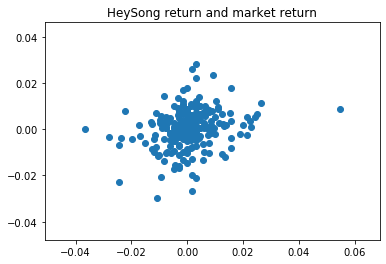

In [5]:
# 畫出散佈圖
import matplotlib.pyplot as plt
plt.scatter(Excess_ret.values[:,0],Excess_ret.values[:,1])
plt.title('HeySong return and market return')

接下來擬合 CAPM 模型，即

$$R_i-R_f=\alpha_i+\beta_i(R_m-R_f)+\varepsilon_i$$

該過程用 statsmodels 套件中的 OLS() 函數實作。

In [6]:
import statsmodels.api as sm
model=sm.OLS(Excess_ret.returns[1:],sm.add_constant(Excess_ret.mktret[1:]))
result=model.fit()
result.summary()

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     18.56
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.39e-05
Time:                        23:29:20   Log-Likelihood:                 797.60
No. Observations:                 243   AIC:                            -1591.
Df Residuals:                     241   BIC:                            -1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.272      0.786      -0.001       0.001
mktret         0.3093      0.072      4.309      0.000       0.168       0.451
==============================================================================
Omnibus:                       49.681   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.021
Skew:                           0.606   Prob(JB):                     1.93e-65
Kurtosis:                       8.288   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

根據 OLS() 的擬合結果，2016 年黑松股票與加權股價指數的關係為：

$$R_i-R_f=0.0002+0.3093\times(R_m-R_f)+\varepsilon_i$$

從 Beta 值來看，mktret 係數的 $P$ 值小於 0.05，即係數顯著不等於 0。係數取值為 0.3093，小於 1，說明黑松股票的波動率小於整個大盤。不過，截距項（Alpha 值）的取值為 0.0002，說明有正的超額收益率，但是截距項的 $P$ 值為 0.786，大於 0.1，Alpha 值並不顯著地異於 0。

### 21.4 CAPM 模型的評價

CAPM 模型形式上簡單明瞭、思想上易於理解，它把任何一種風險證券的價格都劃分為三個因素：無風險收益率、風險的價格和風險的計算單位，並把這三個因素有機結合在一起。CAPM 簡單的線性模型令其在學術界和業界被廣泛使用，並成為現代金融市場價格理論的基礎。

CAPM 建立在 Markowitz 投資組合模型基礎之上，該模型則也建立在 Markowitz 模型的假設之上。總結起來，CAPM 模型需要滿足以下假設：

1. 投資者希望財富越多愈好，效用是財富的函數，財富又是投資收益率的函數，因此可以認為效用為收益率的函數；

2. 投資者能事先知道投資未來收益率的概率分佈為常態分佈，且所有投資者對資產未來收益率概率分佈看法是一致的，投資風險用投資收益率的變異數或標準差度量，影響投資決策的主要因素為期望收益率和風險兩項；

3. 所有投資者具有相同的投資期限；

4. 所有的證券投資可以無限制的細分，在任何一個投資組合裡、含有非整數股份；

5. 投資者都遵守占優準則（Dominance Rule），即同一風險水平下選取收益率較高的證券，同一收益率水平下選取風險較低的證券；

6. 可以在無風險折現率的水平下無限制地借入或貸出資金，買賣證券時沒有稅負及交易成本；

7. 所有投資者可以及時免費獲得充分的市場資訊；

8. 不存在通貨膨脹，且折現率不變。

總結分析上述假設，我們可以推測出投資者是理性的，且嚴格按照 Markowitz 模型的規則進行多樣化的投資，並將從有效邊線的某處選取投資組合；此外，資本巿場是完全有效的市場，沒有任何磨擦阻礙投資。CAPM 的假設前提在現實中難以實現，不過與任何理論模型相似，只要理論模型重點強調的內容可以代表現實，其他部分用假設來簡化則無傷大雅。不過，CAPM 中的 Beta 值非常不確定，相同股票在不同時期估計 Beta 值會得到截然不同的結果，特別是現在幾乎都是在用歷史資料進行計算 Beta 值，這樣的 Beta 對投資的指導意義並不顯著。